In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_dir = "result"
df_situation = pd.read_csv(file_dir + "/situation.csv", index_col=0).reset_index(drop=True)
df_situation

,height,width,dimX,dimY,iter_num,dt,time_span,nu
0,6.28319,6.28319,256,256,1629,0.006136,16,0.0005


In [3]:
height = df_situation["height"][0]
width = df_situation["width"][0]
dimX = df_situation["dimX"][0]
dimY = df_situation["dimY"][0]
dx = width/dimX
dy = height/dimY
iter_num = df_situation["iter_num"][0]
dt = df_situation["dt"][0]
time_span = df_situation["time_span"][0]
nu = df_situation["nu"][0]
num_frame = int(iter_num/time_span) + 1

# Movie

In [4]:
import matplotlib.animation as animation

In [5]:
def update(i, ax_stream, XG, YG):
    print(f"frame: {i}")
    df = pd.read_csv(file_dir + f"/omega{i}.csv", index_col=0)
    df = df.transpose() # In default, indices are x-axis and columns are y-axis
    df = df.iloc[::-1]

    ax_stream.clear()

    im = ax_stream.contour(XG, YG, df.values,colors='black', zorder=0, linewidths=0.9, levels = np.linspace(np.min(df.values), np.max(df.values), 10))
    ax_stream.set_title("Re = 2000, t = {:.3f}".format(dt * i * time_span))


MovieWriter ffmpeg unavailable; using Pillow instead.


frame: 0
frame: 0
frame: 1
frame: 2
frame: 3
frame: 4
frame: 5
frame: 6
frame: 7
frame: 8
frame: 9
frame: 10
frame: 11
frame: 12
frame: 13
frame: 14
frame: 15
frame: 16
frame: 17
frame: 18
frame: 19
frame: 20
frame: 21
frame: 22
frame: 23
frame: 24
frame: 25
frame: 26
frame: 27
frame: 28
frame: 29
frame: 30
frame: 31
frame: 32
frame: 33
frame: 34
frame: 35
frame: 36
frame: 37
frame: 38
frame: 39
frame: 40
frame: 41
frame: 42
frame: 43
frame: 44
frame: 45
frame: 46
frame: 47
frame: 48
frame: 49
frame: 50
frame: 51
frame: 52
frame: 53
frame: 54
frame: 55
frame: 56
frame: 57
frame: 58
frame: 59
frame: 60
frame: 61
frame: 62
frame: 63
frame: 64
frame: 65
frame: 66
frame: 67
frame: 68
frame: 69
frame: 70
frame: 71
frame: 72
frame: 73
frame: 74
frame: 75
frame: 76
frame: 77
frame: 78
frame: 79
frame: 80
frame: 81
frame: 82
frame: 83
frame: 84
frame: 85
frame: 86
frame: 87
frame: 88
frame: 89
frame: 90
frame: 91
frame: 92
frame: 93
frame: 94
frame: 95
frame: 96
frame: 97
frame: 98
frame: 99
f

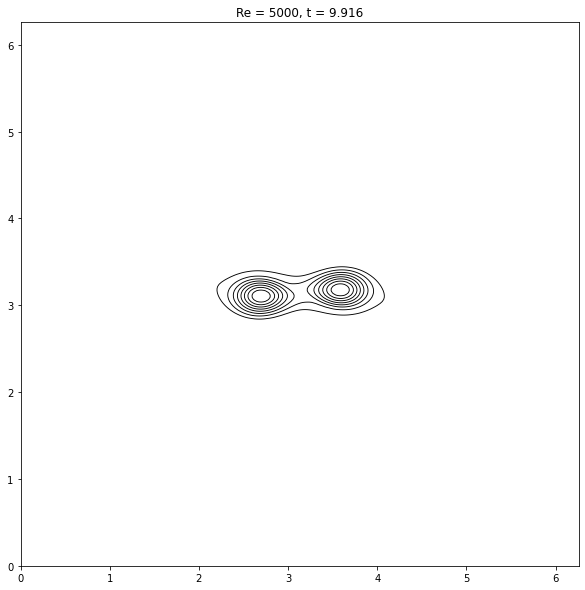

In [6]:
fig,ax_stream = plt.subplots(figsize=(10,10))
xgrid = np.linspace(0,dx*(dimX-1),num=dimX)
ygrid = np.linspace(0,dy*(dimY-1),num=dimY)
ygrid = ygrid[::-1]
XG,YG = np.meshgrid(xgrid, ygrid)

ani = animation.FuncAnimation(fig, update,frames = num_frame, interval = 1, fargs=(ax_stream, XG, YG))
ani.save("vortex.gif")